In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [30]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_train.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (60000,)


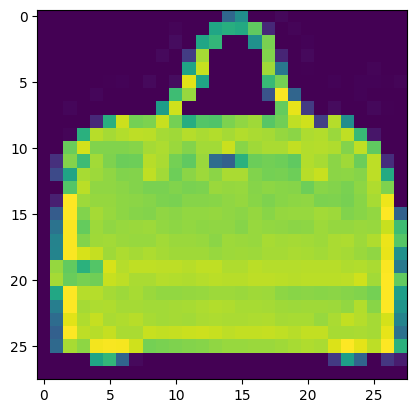

In [32]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))

In [33]:
y_train[220]

8

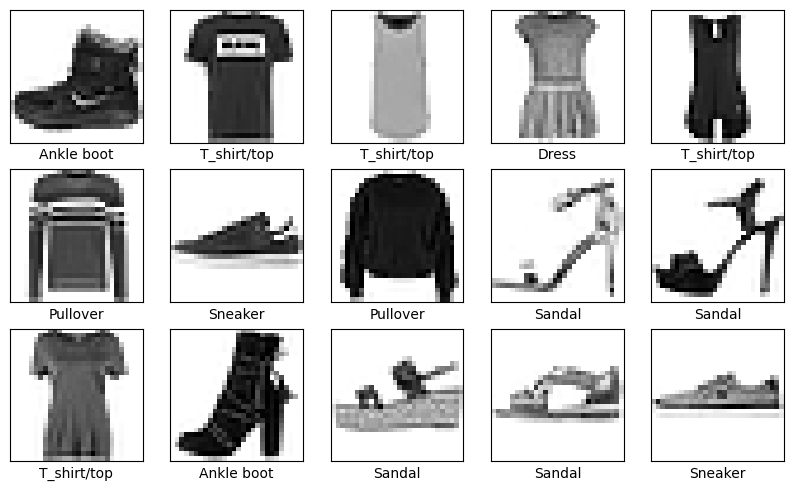

In [34]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [35]:
x_train=x_train/255
x_test=x_test/255

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                16416     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 17,066
Trainable params: 17,066
Non-trainable params: 0
__________________________________________________

In [37]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

In [38]:
history=cnn_model.fit(x_train,y_train,batch_size =512,epochs = 5,verbose = 1,validation_data = (x_test,y_test) )

Epoch 1/5
118/118 [==============================] - 5s 33ms/step - loss: 1.2848 - accuracy: 0.6010 - val_loss: 0.6913 - val_accuracy: 0.7506
Epoch 2/5
118/118 [==============================] - 3s 27ms/step - loss: 0.6146 - accuracy: 0.7789 - val_loss: 0.5836 - val_accuracy: 0.7874
Epoch 3/5
118/118 [==============================] - 3s 25ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5379 - val_accuracy: 0.8028
Epoch 4/5
118/118 [==============================] - 4s 37ms/step - loss: 0.5020 - accuracy: 0.8172 - val_loss: 0.5184 - val_accuracy: 0.8090
Epoch 5/5
118/118 [==============================] - 3s 26ms/step - loss: 0.4736 - accuracy: 0.8285 - val_loss: 0.4999 - val_accuracy: 0.8177


In [39]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.8177


[0.4998535215854645, 0.8177000284194946]

In [40]:
probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


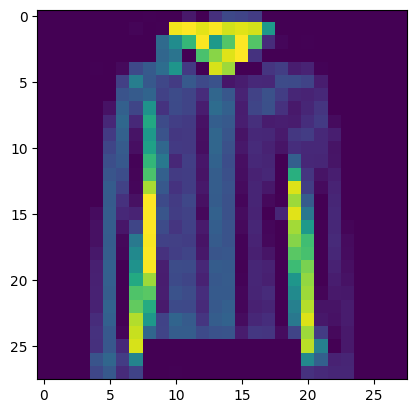

In [41]:
img = x_test[6]
plt.imshow(img)

In [42]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Shirt'

In [43]:
y_actual = class_names[y_test[6]]
y_actual

'Coat'

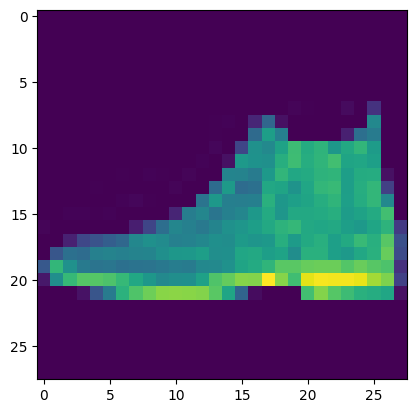

In [44]:
img = x_test[0]
plt.imshow(img)

In [45]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict

'Ankle boot'

In [46]:
y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [47]:
test_loss, test_accuracy = cnn_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4674 - accuracy: 0.8312


In [48]:
print(test_accuracy)

0.831166684627533


In [49]:
print(test_loss)

0.46743255853652954


In [50]:
history.history

{'loss': [1.2848187685012817,
  0.6145640015602112,
  0.5404322147369385,
  0.502038300037384,
  0.4736345708370209],
 'accuracy': [0.6009666919708252,
  0.7789166569709778,
  0.8053500056266785,
  0.8172000050544739,
  0.8285166621208191],
 'val_loss': [0.6912757754325867,
  0.5836320519447327,
  0.5378892421722412,
  0.5183724761009216,
  0.4998534321784973],
 'val_accuracy': [0.7505999803543091,
  0.7874000072479248,
  0.8027999997138977,
  0.8090000152587891,
  0.8177000284194946]}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

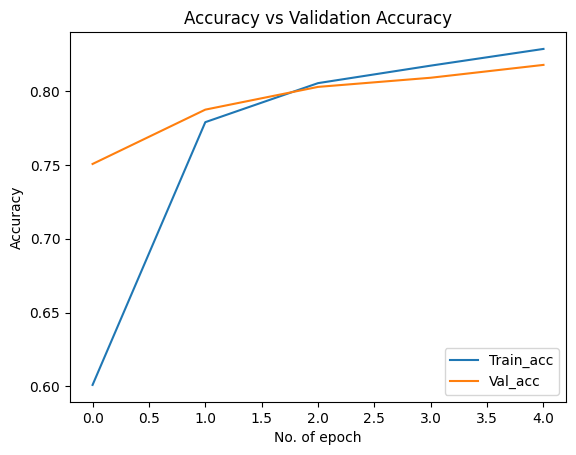

In [52]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()

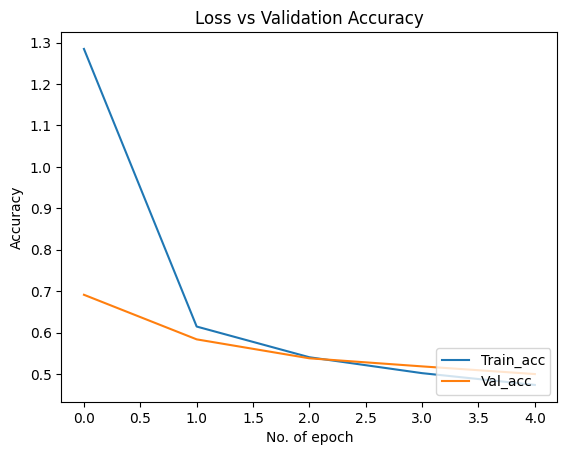

In [53]:
plt.plot(history.history['loss'],label='Accuracy')
plt.plot(history.history['val_loss'])
plt.title("Loss vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()